In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
from matplotlib.ticker import MaxNLocator
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size':16})


In [2]:
cars_df = pd.read_csv('data/cars.csv')

In [3]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
cars_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
cars_df['mpg'].hasnans

False

In [7]:
cars_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name'],
      dtype='object')

In [8]:
has_non_numbers = []
for col in cars_df.columns:
    has_non_numbers.append(cars_df[col].hasnans)
has_non_numbers

[False, False, False, False, False, False, False, False, False]

In [9]:
cars_df.loc[cars_df['horsepower']=='?','horsepower'] = np.nan

In [10]:
cars_df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [11]:
cars_df.horsepower = cars_df.horsepower.astype(float)

In [12]:
print(type(cars_df.horsepower[1]))

<class 'numpy.float64'>


In [13]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [14]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [15]:
cars_df['car_makes']=cars_df['car_name'].apply(lambda x: x.split()[0])



In [16]:

cars_df.loc[(cars_df['car_makes'] == 'chevroelt')| (cars_df['car_makes']== 'chevy'), 'car_makes'] = 'chevrolet'    

In [17]:
len(cars_df.car_makes.unique())

35

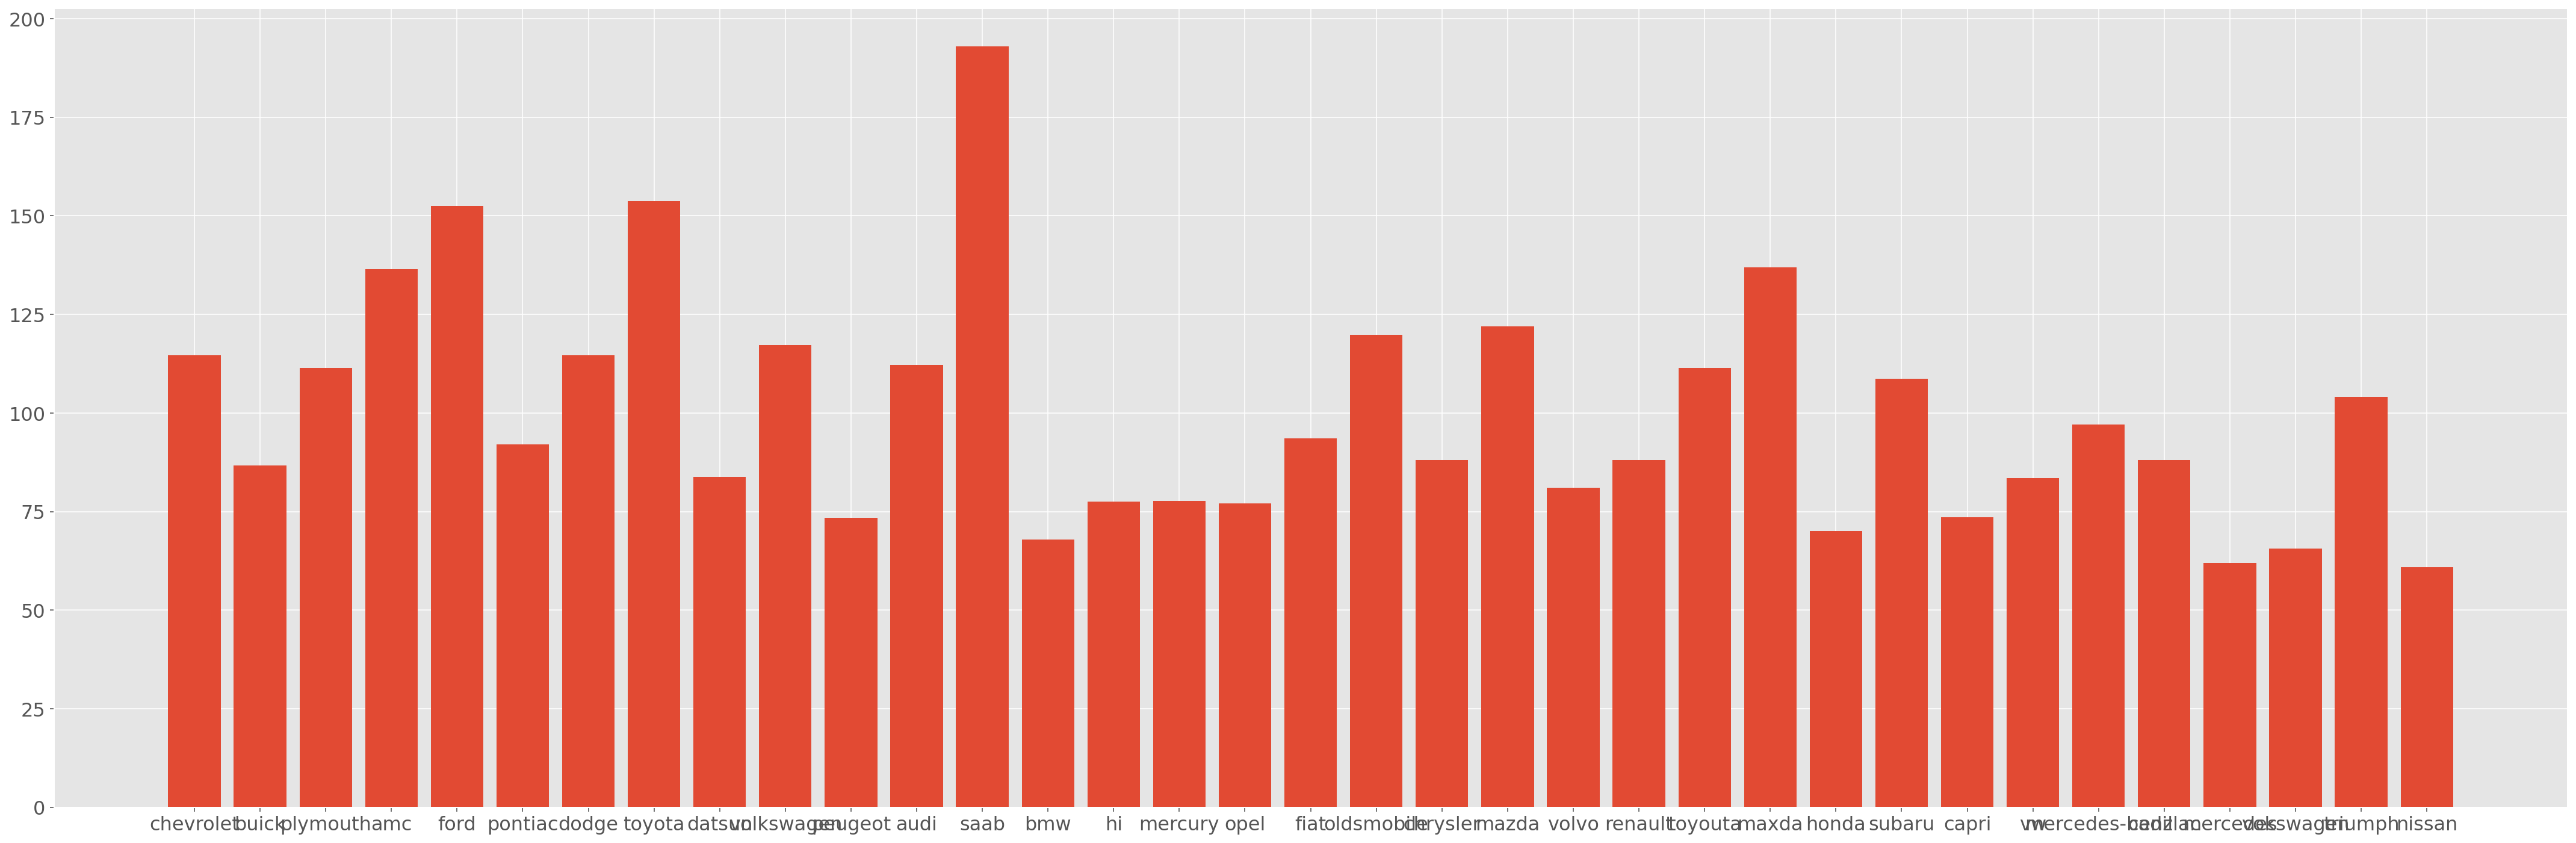

In [18]:
fig, ax = plt.subplots(figsize=(30,10))

x= cars_df.car_makes.unique()
y = cars_df.groupby(by='car_makes')['horsepower'].mean()

ax.bar(x, y)
plt.tight_layout()




In [19]:
cars_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [20]:
# Do Ford cars have a higher horsepower than Chevy cars, on average ? 
# H0 Ford cars and Chevy cars have the same horsepower, on average
# HA The average horsepower for Ford cars is greater than Chevy 


In [21]:
# Choose Level of Significance : Alpha is 0.05

In [22]:
#choose level of statistical power : standard is .8


In [23]:
# Choose a statistical test and find test statistic
# 2 Sample Independent T Test 

# Test statistic is the difference in means between Ford and Chevy

In [24]:
# compute probability of results assuming null hypothesis is true = pvalue 

In [25]:
#compare alpha to pvalue and draw conclusions
# reject or fail to reject 

In [26]:
chevrolet_mean = np.mean(cars_df.query("car_makes == 'chevrolet'")['horsepower'])
chevrolet_std = np.std(cars_df.query("car_makes == 'chevrolet'")['horsepower'])
ford_mean = np.mean(cars_df.query("car_makes == 'ford'")['horsepower'])
ford_std = np.std(cars_df.query("car_makes == 'ford'")['horsepower'])

In [27]:
print(f'chevrolet_mean: {chevrolet_mean}')
print(f'chevrolet_std:  {chevrolet_std}')
print(f' ford_mean: {ford_mean}')
print(f' ford_std: {ford_std}')

chevrolet_mean: 114.63829787234043
chevrolet_std:  36.73506385256051
 ford_mean: 112.22916666666667
 ford_std: 36.75041926253662


In [28]:
#what scipy functions do we use to generate the first sample distribution
chevrolet_dist = stats.norm(loc = 114.6389, scale=chevrolet_std)

#we are not generating a sample distribution here, we have a population and we derive samples from that 
#generate samples from our current data for chevy and ford using 


#do we have to generate more samples ? The assumption is yes, in order to increase the precision of the mean 

# we can use bootstrap sample creation if our initial samples don't look normally distributed and then the sampling distribution of the 
#sampling means both would be normally distributed 


#believing that CLT will pan out to a normal distribution: 
# we use the norm distribution to generate chevrolet dist then we use chevrolet_dist.rvs with a number of samples to generate samples 

In [29]:
chevrolet_mean = np.mean(cars_df.query("car_makes == 'chevrolet'")['horsepower'])
chevrolet_mean

114.63829787234043

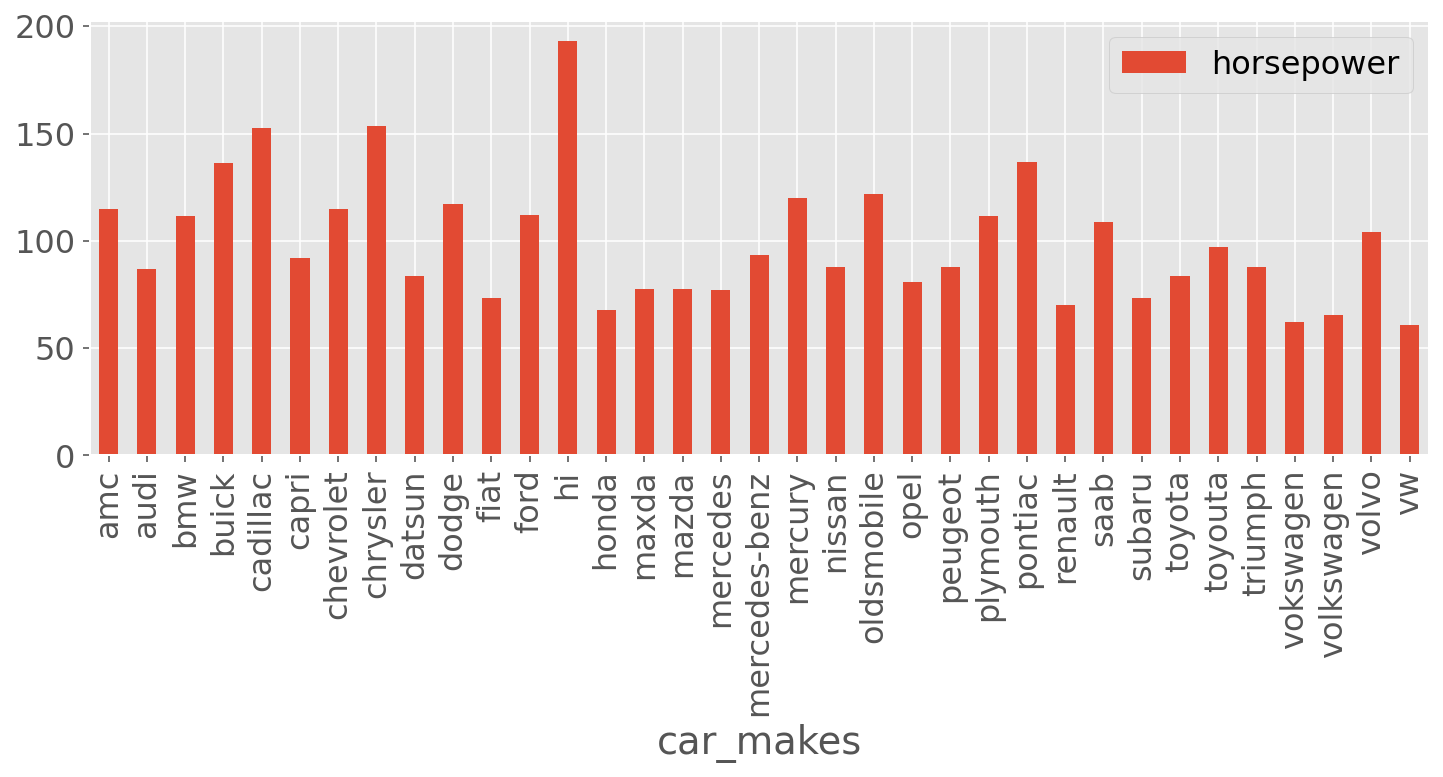

In [30]:
cars_df.groupby('car_makes')[['car_makes','horsepower']].mean().plot.bar(figsize=(12,4));

car_makes
chevrolet    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ford         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

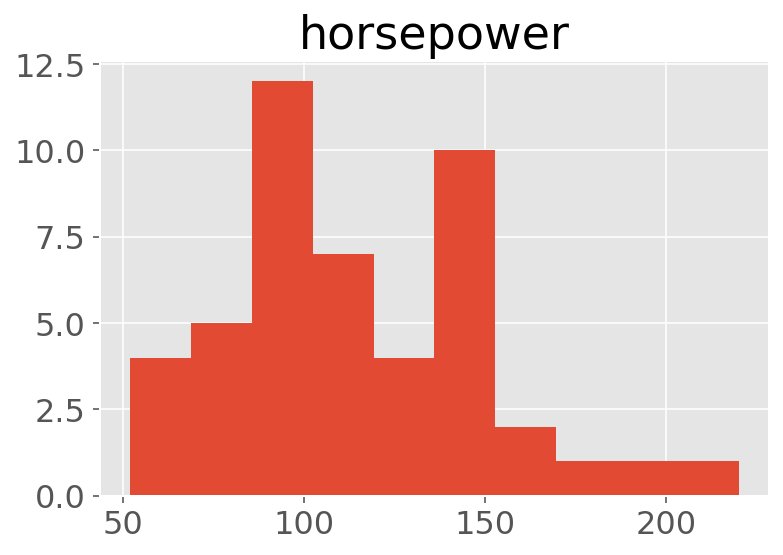

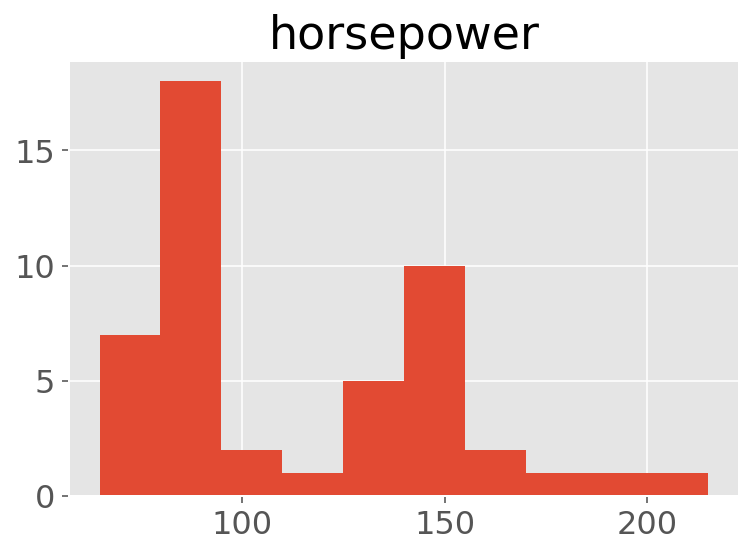

In [31]:
cars_df[(cars_df['car_makes']=='ford')|(cars_df['car_makes']=='chevrolet')].groupby('car_makes').hist('horsepower')

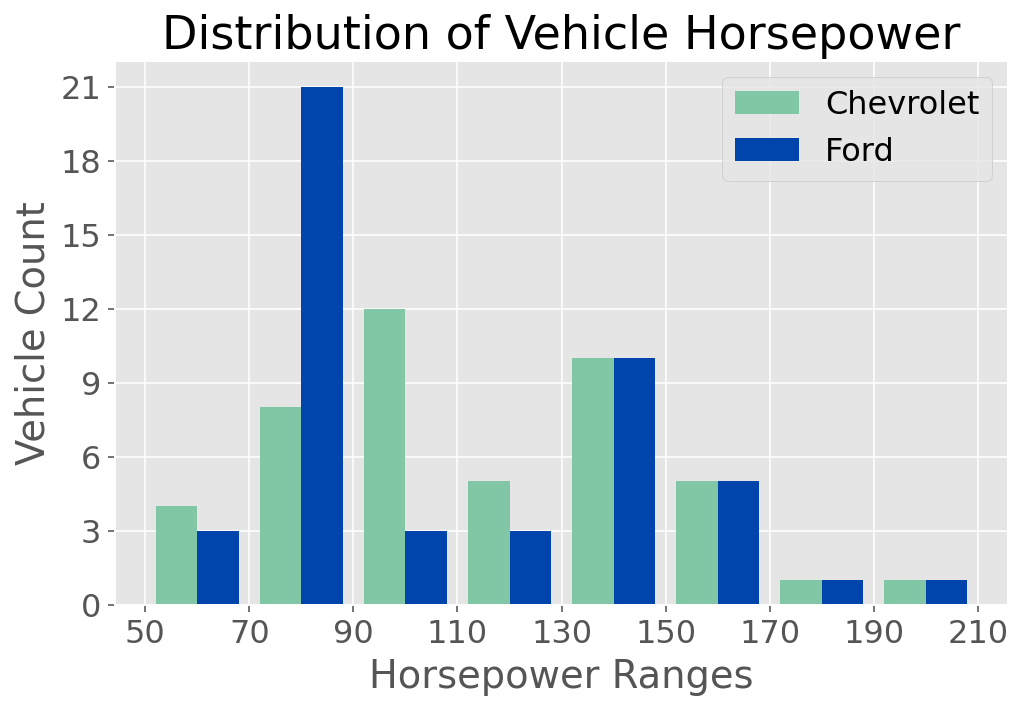

In [32]:
fig,ax = plt.subplots(figsize=(8,5))
counts,bins,_ = ax.hist([cars_df[cars_df['car_makes']=='chevrolet'].horsepower,cars_df[cars_df['car_makes']=='ford'].horsepower],label=['Chevrolet','Ford'],bins=range(50,225,20),color=['#82c7a5','#0145ac'])
ax.legend()
ax.set_xlabel('Horsepower Ranges')
ax.set_ylabel('Vehicle Count')
ax.set_title('Distribution of Vehicle Horsepower')
ax.set_xticks(bins)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

fig.savefig('images/hist_of_horsepower.png',dpi=300)

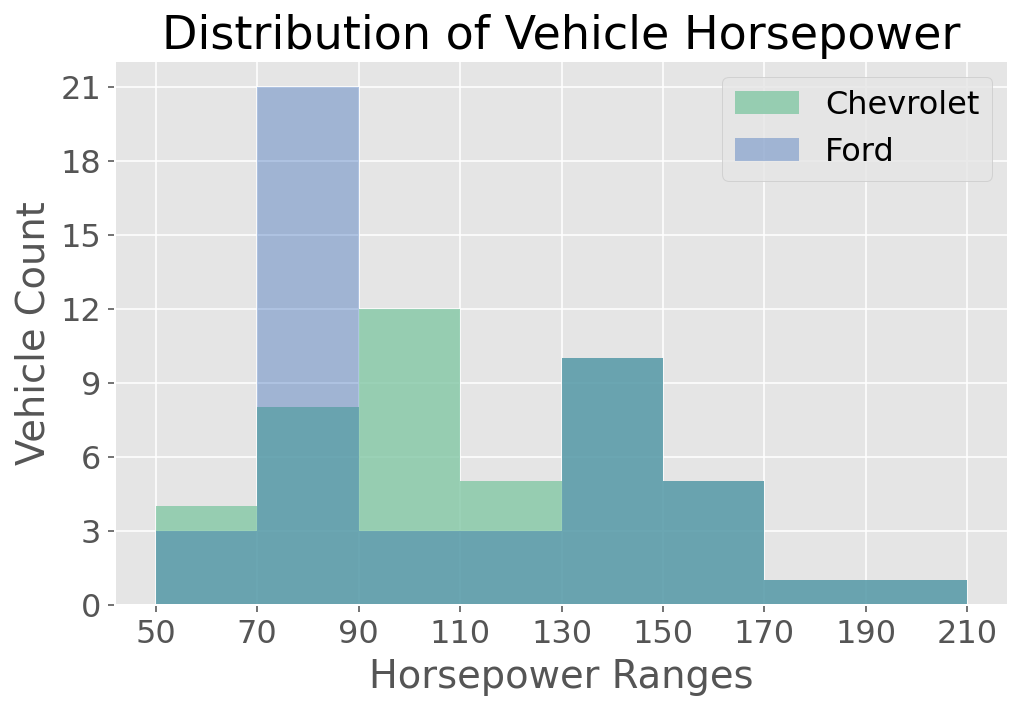

In [33]:
fig,ax = plt.subplots(figsize=(8,5))
bins=range(50,225,20)
counts,bins,_ = ax.hist(cars_df[cars_df['car_makes']=='chevrolet'].horsepower,label='Chevrolet',color='#82c7a5',bins=bins,alpha=.8)
counts,bins,_ = ax.hist(cars_df[cars_df['car_makes']=='ford'].horsepower,label='Ford',color='#0145ac',bins=bins,alpha=.3)

ax.legend()
ax.set_xlabel('Horsepower Ranges')
ax.set_ylabel('Vehicle Count')
ax.set_title('Distribution of Vehicle Horsepower')
ax.set_xticks(bins)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.savefig('images/hist_of_horsepower.png',dpi=300)

car_makes
chevrolet    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ford         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

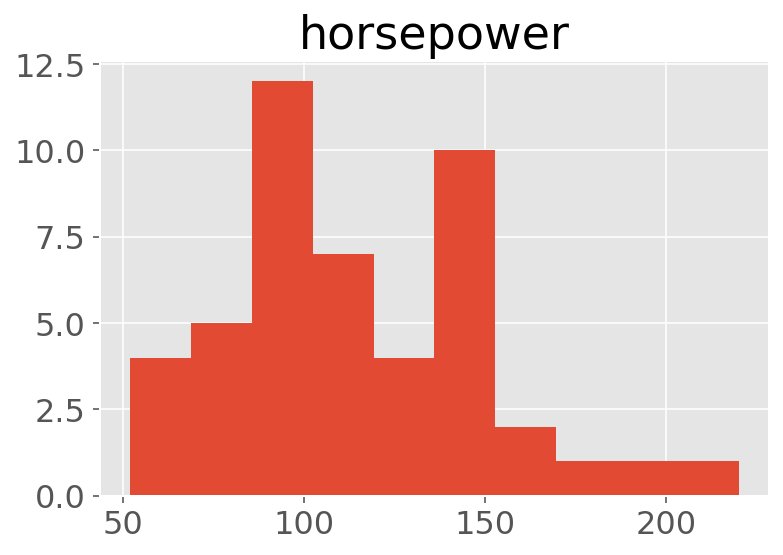

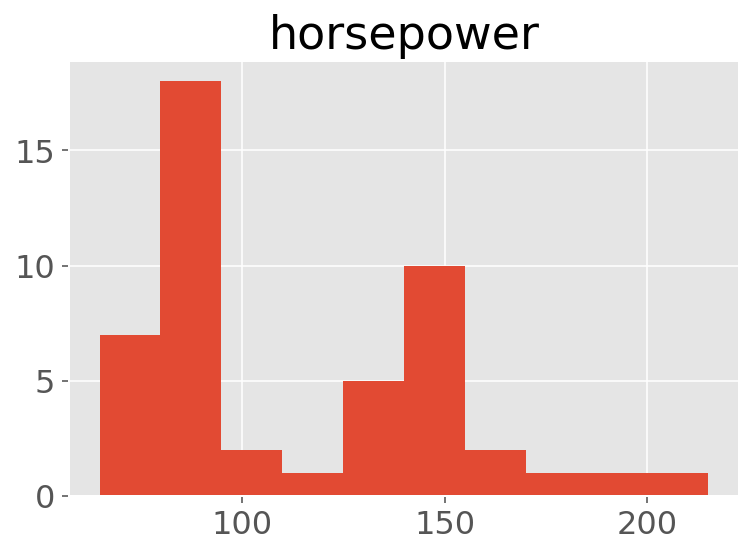

In [34]:
cars_df[(cars_df['car_makes']=='chevrolet')|(cars_df['car_makes']=='ford')].groupby('car_makes').hist('horsepower')

/home/rpeterson/anaconda3/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/home/rpeterson/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


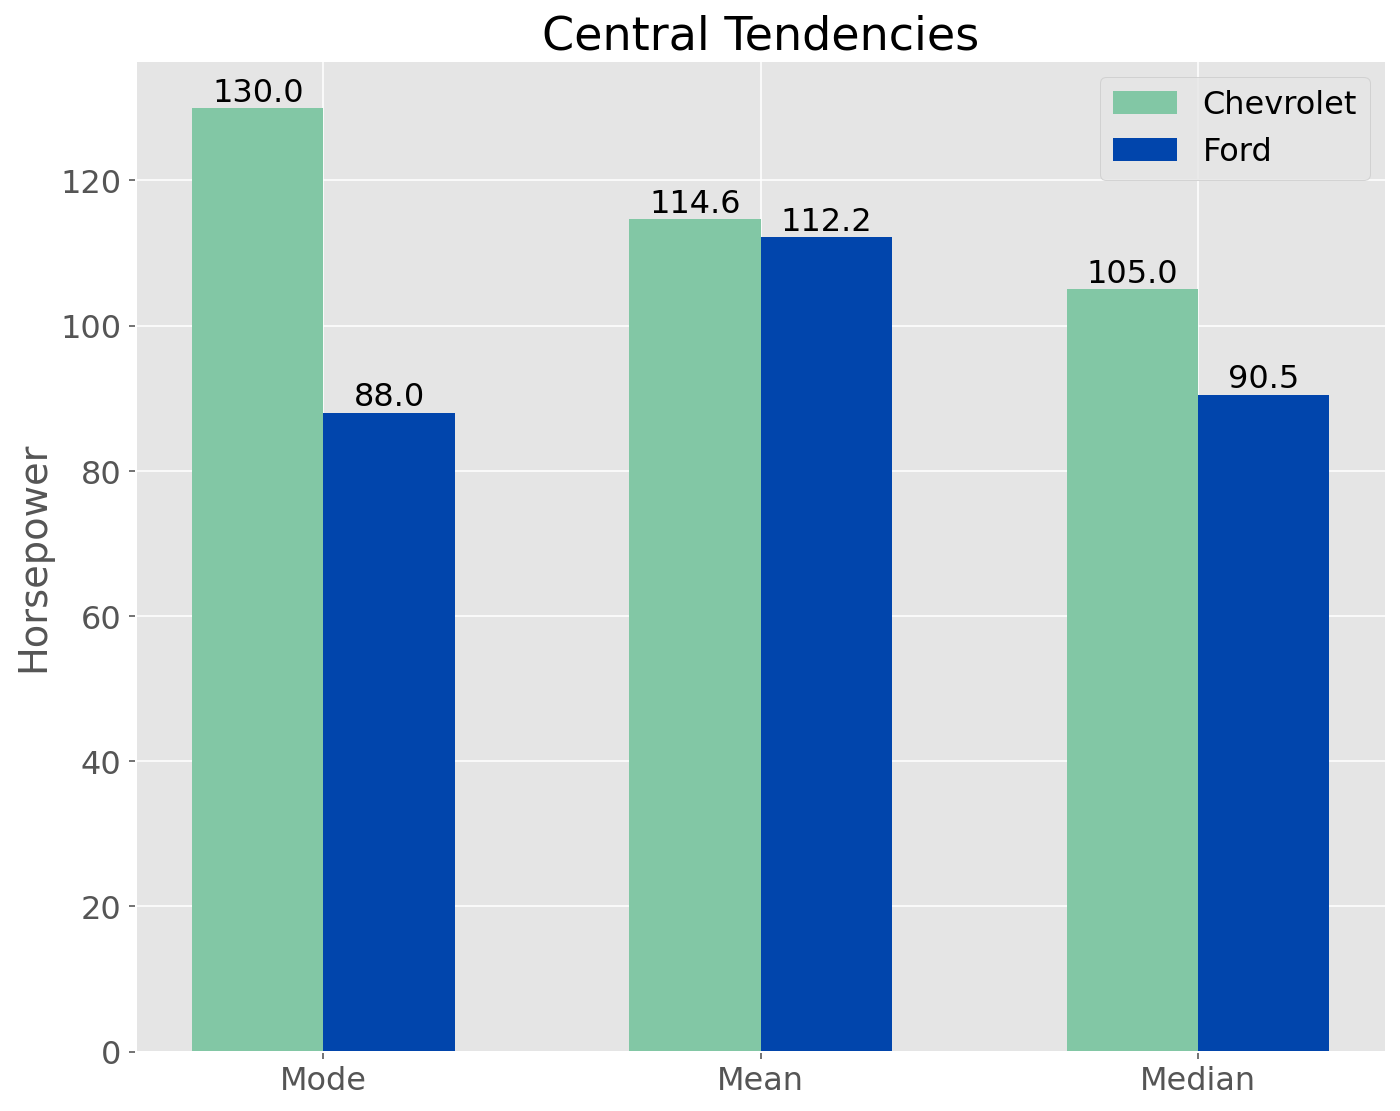

In [35]:
chevrolet_mean = np.mean(cars_df.query("car_makes == 'chevrolet'")['horsepower'])
chevrolet_median = np.median(cars_df.query("car_makes == 'chevrolet'").dropna()['horsepower'])
chevrolet_mode = cars_df.query("car_makes == 'chevrolet'").dropna()['horsepower']
ford_mean = np.mean(cars_df.query("car_makes == 'ford'")['horsepower'])
ford_median = np.median(cars_df.query("car_makes == 'ford'").dropna()['horsepower'])
ford_mode = stats.mode(cars_df.query("car_makes == 'ford'").dropna()['horsepower'])

fig, ax = plt.subplots(figsize=(10,8))
chevy_info = [chevrolet_mode[0],chevrolet_mean,chevrolet_median]
ford_info = [ford_mode[0],ford_mean,ford_median]

ind = np.arange(3)
width = .3

chevy_bars = ax.bar(ind,chevy_info,width=width,label='Chevrolet',color='#82c7a5')
ford_bars = ax.bar(ind+width,ford_info,width=width,label='Ford',color='#0145ac')
ax.bar_label(chevy_bars,fmt='%.1f')
ax.bar_label(ford_bars,fmt='%.1f')

plt.title('Central Tendencies')
ax.set_ylabel('Horsepower')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['Mode', 'Mean', 'Median'])

ax.legend()  
fig.tight_layout()
fig.savefig('images/Central_Tendencies.png',dpi=300)

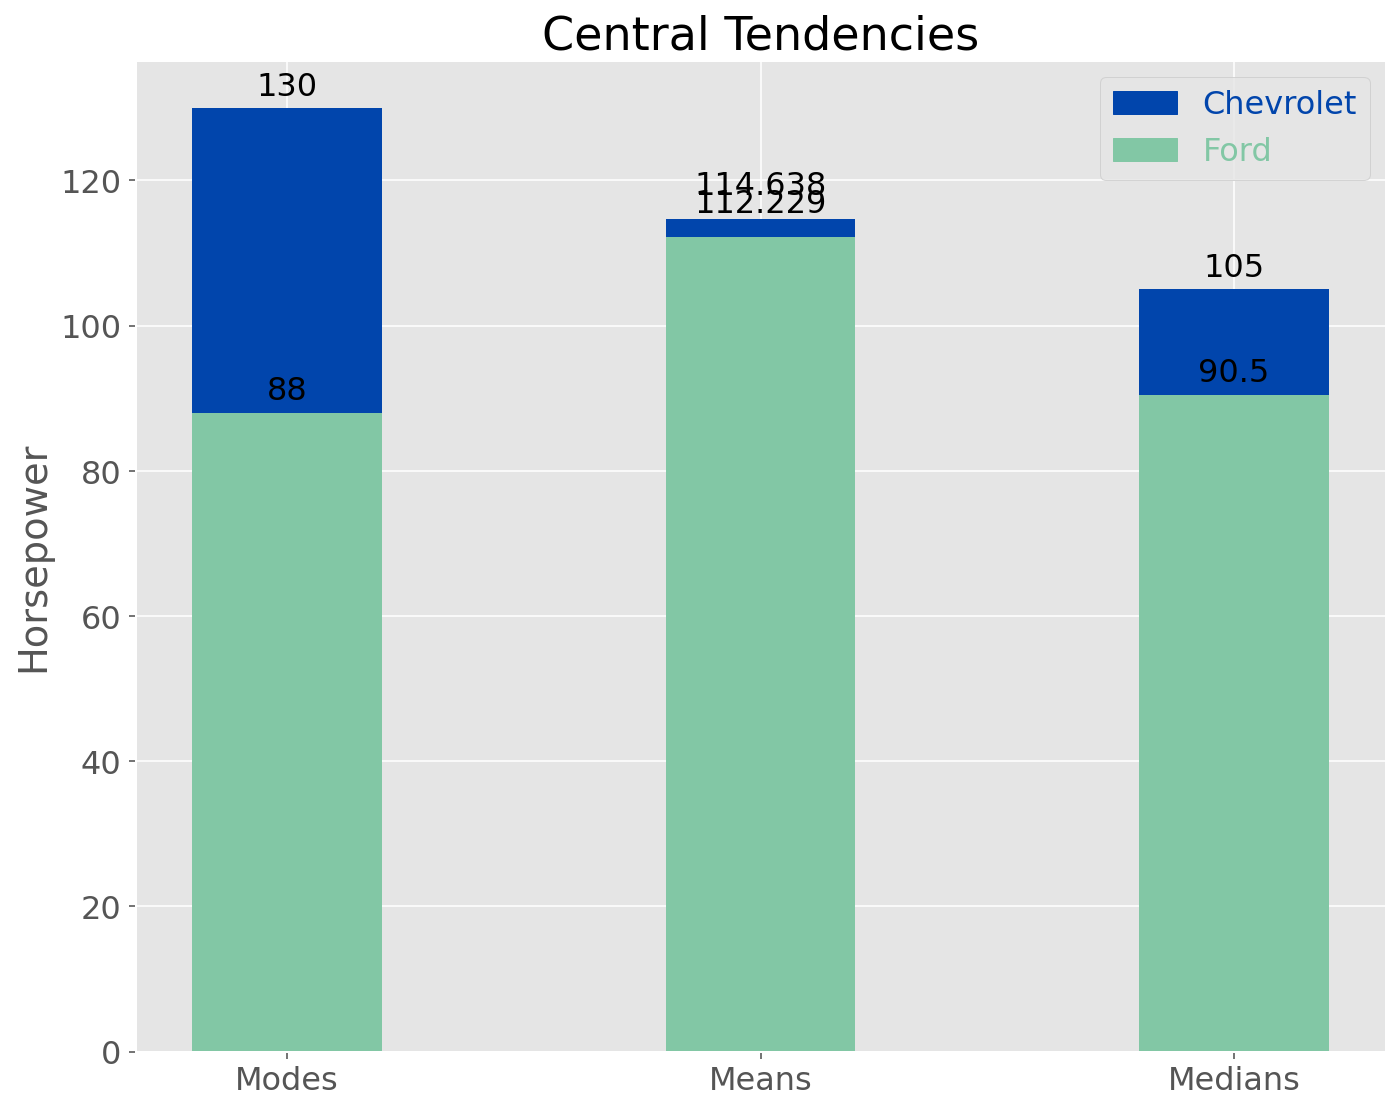

In [36]:
chevrolet_mean = np.mean(cars_df.query("car_makes == 'chevrolet'")['horsepower'])
chevrolet_std = np.std(cars_df.query("car_makes == 'chevrolet'")['horsepower'])
chevrolet_median = np.median(cars_df.query("car_makes == 'chevrolet'").dropna()['horsepower'])
chevrolet_mode = cars_df.query("car_makes == 'chevrolet'").dropna()['horsepower']
ford_mean = np.mean(cars_df.query("car_makes == 'ford'")['horsepower'])
ford_std = np.std(cars_df.query("car_makes == 'ford'")['horsepower'])
ford_median = np.median(cars_df.query("car_makes == 'ford'").dropna()['horsepower'])
ford_mode = stats.mode(cars_df.query("car_makes == 'ford'").dropna()['horsepower'])
list_of_means=(114.63829787234043,112.22916666666667)
vehicles = ('Chevrolet', 'Ford')
list_of_medians = (chevrolet_median,ford_median)
list_of_modes = (chevrolet_mode[0],ford_mode[0])

fig, ax = plt.subplots(figsize=(10,8))
rects1 =ax.bar('Modes', list_of_modes,color=['#0145ac','#82c7a5'],width = 0.4)
rects2 = ax.bar('Means', list_of_means,  color=['#0145ac','#82c7a5'], width = 0.4)
rects3 = ax.bar('Medians', list_of_medians,   color=['#0145ac','#82c7a5'], width = 0.4)
ax.bar_label(rects1,padding = 3)
ax.bar_label(rects2, padding = 9)
ax.bar_label(ax.containers[2],  padding = 3)
plt.title('Central Tendencies')
# ax.set_xlabel('Chevrolet VS Ford ')
ax.set_ylabel('Horsepower')
ax.legend(['Chevrolet', 'Ford'], labelcolor=['#0145ac','#82c7a5'])
leg = ax.get_legend()
leg.legendHandles[0].set_color('#0145ac')
leg.legendHandles[1].set_color('#82c7a5')
fig.tight_layout()
# plt.savefig('images/Central Tendencies.png',dpi=300)

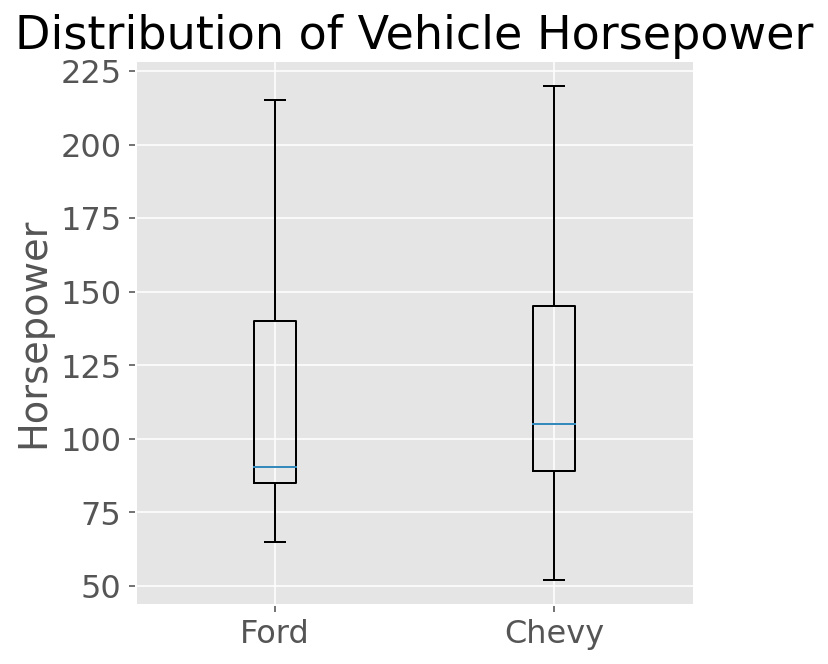

In [37]:
fig,ax = plt.subplots(figsize=(5,5))



ax.boxplot([cars_df[cars_df['car_makes']=='ford'].horsepower.dropna(),cars_df[cars_df['car_makes']=='chevrolet'].horsepower],labels=['Ford','Chevy'])

ax.set_ylabel('Horsepower')

ax.set_title('Distribution of Vehicle Horsepower')

fig.savefig('images/hist_of_horsepower.png')


In [38]:
[cars_df[cars_df['car_makes']=='ford'].horsepower,cars_df[cars_df['car_makes']=='chevrolet'].horsepower]

[4      140.0
 5      198.0
 17      85.0
 25     215.0
 32       NaN
 36      88.0
 40     153.0
 43     170.0
 48      88.0
 61      86.0
 65     153.0
 74     140.0
 80      86.0
 88     137.0
 92     158.0
 100     88.0
 104    167.0
 112     85.0
 126      NaN
 130     80.0
 136    140.0
 139    140.0
 155     72.0
 159    148.0
 166    129.0
 168     83.0
 174     97.0
 190    152.0
 193     81.0
 200     78.0
 206     72.0
 214    130.0
 228     98.0
 232    149.0
 236     89.0
 245     66.0
 254     85.0
 255     88.0
 264    139.0
 282     88.0
 286    129.0
 290    142.0
 314     88.0
 336      NaN
 351     65.0
 352     65.0
 365     88.0
 373     92.0
 389    112.0
 393     86.0
 396     79.0
 Name: horsepower, dtype: float64,
 0      130.0
 6      220.0
 12     150.0
 26     200.0
 30      90.0
 35     100.0
 38     165.0
 46      72.0
 60      90.0
 62     165.0
 73     130.0
 87     145.0
 91     150.0
 98     100.0
 103    150.0
 109     72.0
 115    145.0
 128    100.0

In [39]:
def bootstrap_sample_means(data, n_bootstrap_samples=10000):
    bootstrap_sample_means = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(np.nanmean(bootstrap_sample))
    return bootstrap_sample_means

In [40]:
chevy_hp = np.array(cars_df[(cars_df['car_makes']=='chevrolet')].horsepower)
ford_hp = np.array(cars_df[(cars_df['car_makes']=='ford')].horsepower)

In [41]:
chevy_means = bootstrap_sample_means(chevy_hp,100)
ford_means = bootstrap_sample_means(ford_hp,100)

In [42]:
chevy_means

[112.65957446808511,
 105.25531914893617,
 111.31914893617021,
 110.76595744680851,
 111.04255319148936,
 111.59574468085107,
 115.1063829787234,
 107.61702127659575,
 116.12765957446808,
 108.48936170212765,
 118.0,
 115.76595744680851,
 111.57446808510639,
 108.42553191489361,
 119.59574468085107,
 120.12765957446808,
 119.0,
 104.06382978723404,
 114.31914893617021,
 109.44680851063829,
 113.87234042553192,
 118.91489361702128,
 105.29787234042553,
 107.55319148936171,
 116.51063829787235,
 103.31914893617021,
 115.12765957446808,
 115.23404255319149,
 121.44680851063829,
 103.08510638297872,
 116.70212765957447,
 112.82978723404256,
 115.29787234042553,
 114.72340425531915,
 104.82978723404256,
 111.27659574468085,
 112.29787234042553,
 115.48936170212765,
 117.27659574468085,
 126.76595744680851,
 115.65957446808511,
 124.63829787234043,
 115.27659574468085,
 113.70212765957447,
 108.87234042553192,
 109.53191489361703,
 122.93617021276596,
 113.42553191489361,
 113.04255319148936

In [43]:
ford_means

[112.72549019607843,
 110.93877551020408,
 114.29787234042553,
 109.375,
 117.79166666666667,
 104.35416666666667,
 108.25531914893617,
 119.12765957446808,
 117.72,
 109.46938775510205,
 109.20408163265306,
 111.79166666666667,
 107.85714285714286,
 119.91836734693878,
 105.72340425531915,
 112.86666666666666,
 111.74509803921569,
 107.97826086956522,
 116.61224489795919,
 109.34042553191489,
 117.26666666666667,
 100.33333333333333,
 112.42,
 116.51020408163265,
 110.34,
 118.34042553191489,
 107.28260869565217,
 121.91666666666667,
 111.84782608695652,
 116.58,
 121.04081632653062,
 122.14893617021276,
 111.9375,
 107.97872340425532,
 104.6,
 116.6875,
 103.85106382978724,
 108.16666666666667,
 102.74,
 103.28571428571429,
 119.46808510638297,
 117.94117647058823,
 114.58,
 112.41666666666667,
 111.36170212765957,
 115.77083333333333,
 110.12244897959184,
 114.52173913043478,
 109.11111111111111,
 117.27659574468085,
 112.0,
 106.83673469387755,
 111.0,
 114.38775510204081,
 114.333

In [44]:


def sample_mean_distribution(column_name,sample_size):
    horsepower_array = np.array(cars_df[(cars_df['car_makes']== column_name)].horsepower)
    sample_means = bootstrap_sample_means(horsepower_array,sample_size)
    
    sample_means_mean = np.mean(sample_means)
    sample_means_std = np.std(sample_means)
    sample_means_dist= stats.norm(loc=sample_means_mean, scale = sample_means_std)
    
    return {'dist': sample_means_dist,
            'mean': sample_means_mean,
            'std' : sample_means_std}


def draw_dist_plot(ax, sample_means_dist, label, size=1000):
    x_values=np.arange(size)
    y_values = sample_means_dist['dist'].pdf(x_values)
    ax.set_xlim(75,150)
    lines = ax.plot(x_values, sample_means_dist['dist'].pdf(x_values), label=label)
    ax.axvline(sample_means_dist['mean'], color= lines[0].get_c(), linewidth=3, label='Mean')
    ax.legend()
    



114.69125531914894
5.118681549514658
104.65882383377053
124.72368680452735


Text(0.5, 1.0, 'Distribution of Sample Means')

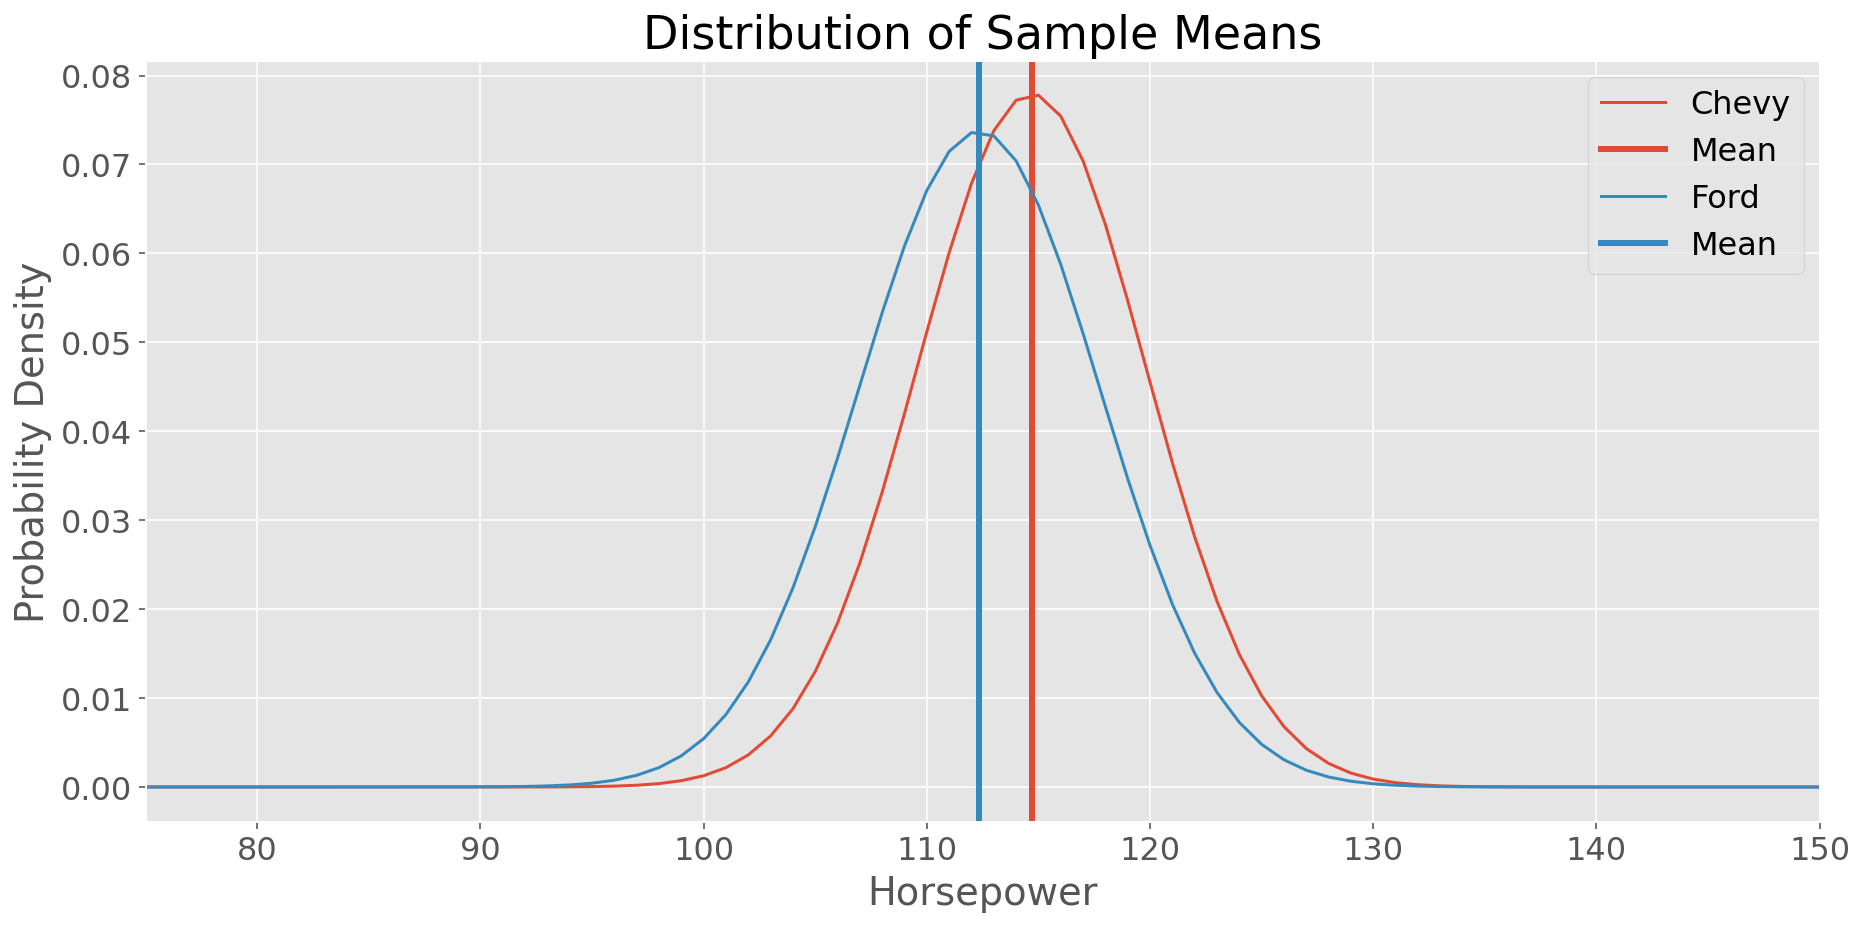

In [45]:
chevy_dist = sample_mean_distribution('chevrolet',1000)
ford_dist = sample_mean_distribution('ford',1000)
print(chevy_dist['mean'])
print(chevy_dist['std'])
print(chevy_dist['dist'].ppf(0.025))
print(chevy_dist['dist'].ppf(0.975))

fig, ax = plt.subplots(figsize=(15,7))

draw_dist_plot(ax,chevy_dist,'Chevy')


draw_dist_plot(ax,ford_dist,'Ford')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Probability Density')
ax.set_title('Distribution of Sample Means')

In [46]:
stats.ttest_ind(cars_df[cars_df.car_makes=='ford'].horsepower.dropna(),cars_df[cars_df.car_makes=='chevrolet'].horsepower.dropna(),equal_var=True,alternative='greater')

Ttest_indResult(statistic=-0.31613701402528943, pvalue=0.6236965245927901)

In [47]:
stats.ttest_ind(cars_df[cars_df.car_makes=='ford'].horsepower.dropna(),cars_df[cars_df.car_makes=='chevrolet'].horsepower.dropna(),equal_var=False,alternative='greater')

Ttest_indResult(statistic=-0.31613765820721573, pvalue=0.6236966109778618)

In [48]:
# ford greater than chevy
stats.ttest_ind(ford_dist['dist'].rvs(1000),chevy_dist['dist'].rvs(1000),equal_var=True,alternative='greater')

Ttest_indResult(statistic=-9.553290142223211, pvalue=1.0)

In [49]:
# chevy greater than ford
stats.ttest_ind(chevy_dist['dist'].rvs(1000),ford_dist['dist'].rvs(1000),equal_var=True,alternative='greater')

Ttest_indResult(statistic=11.329625289339555, pvalue=3.4873209444658934e-29)

In [50]:
stats.mannwhitneyu(cars_df[cars_df.car_makes=='ford'].horsepower.dropna(),cars_df[cars_df.car_makes=='chevrolet'].horsepower.dropna(), use_continuity=True, alternative='less', axis=0, method='auto')


MannwhitneyuResult(statistic=1019.5, pvalue=0.21049171202280353)

In [51]:
stats.mannwhitneyu(cars_df[cars_df.car_makes=='chevrolet'].horsepower.dropna(),cars_df[cars_df.car_makes=='ford'].horsepower.dropna(), use_continuity=True, alternative='greater', axis=0, method='auto')

MannwhitneyuResult(statistic=1236.5, pvalue=0.21049171202280353)

In [52]:
print(len(cars_df[cars_df.car_makes=='ford'].horsepower.dropna())*len(cars_df[cars_df.car_makes=='chevrolet'].horsepower.dropna()))
print(len(cars_df[cars_df.car_makes=='chevrolet'].horsepower.dropna()))
print(len(cars_df[cars_df.car_makes=='ford'].horsepower.dropna()))
print(len(cars_df[cars_df.car_makes=='chevrolet'].horsepower))
print(len(cars_df[cars_df.car_makes=='ford'].horsepower))

2256
47
48
47
51


In [53]:
a = [0,0,0,0,0,0]
b = [1,1,1,1,1,1]
stats.mannwhitneyu(a,b,alternative='less')

MannwhitneyuResult(statistic=0.0, pvalue=0.0006309723836939866)


rcParams["axes.prop_cycle"] (default: cycler('color', [#82c7a5,#0145ac]))
#82c7a5
#0145ac